In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Outcome = 1 Diabetics
# Outcome = 0 Healthly
data = pd.read_csv("diabetes.csv")
data.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


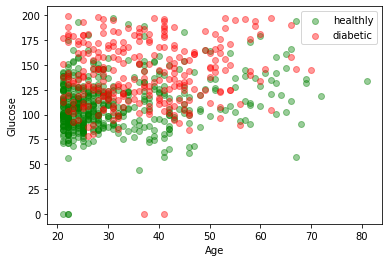

In [2]:


diabetics = data[data.Outcome == 1]
healthly = data[data.Outcome == 0]


# Make an example drawing by looking at gloucose:
# At the end of program, machine learning model will make a prediction by looking at all the other data, not just glucose.
plt.scatter(healthly.Age, healthly.Glucose, color="green", label="healthly", alpha = 0.4)
plt.scatter(diabetics.Age, diabetics.Glucose, color="red", label="diabetic", alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()


In [3]:


# Determine the x and y axes.
y = data.Outcome.values
x_raw_data = data.drop(["Outcome"],axis=1)   
# Remove the outcome column (dependent variable) and leave only independent variables.
# Because the KNN algorithm will group within the x values.

# Normalize - update all values in x_raw_data so that they are only between 0 and 1
# If we don't normalize, high numbers will overwhelm the small numbers and may confuse the KNN algorithm!
x = (x_raw_data - np.min(x_raw_data))/(np.max(x_raw_data)-np.min(x_raw_data))

# Before
print("Raw data before normalization:\n")
print(x_raw_data.head())


# After 
print("\n\n\nThe data we will give for training to ai after normalization:\n")
print(x.head())
    



Normalization öncesi ham veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



Normalization sonrası yapay zekaya eğitim için vereceğimiz veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  

In [6]:
# Separate train data and test data.
# Train data will be used to learn the system to distinguish between a healthy person and a sick person.
# Let's see if machine learning model can correctly distinguish between sick and healthy people.
# Used to test...
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=1)

# Create knn model.
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("Confirmation test result of test data for K=3 ", knn.score(x_test, y_test))


NameError: name 'x' is not defined

In [8]:
# Determine the best k value.
counter = 1
for k in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = k)
    knn_new.fit(x_train,y_train)
    print(counter, "  ", "Accuracy rate: %", knn_new.score(x_test,y_test)*100)
    counter += 1

NameError: name 'x_train' is not defined

In [5]:
# For a new patient estimate:
from sklearn.preprocessing import MinMaxScaler

# Normalization - used MinMax scaler to normalize faster.
sc = MinMaxScaler()
sc.fit_transform(x_raw_data)

new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

NameError: name 'x_raw_data' is not defined